## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

## Generate Datasets

In [4]:
from sklearn import datasets

In [5]:
X, y = datasets.make_moons(n_samples=300, noise=0.3, random_state=1)

## Visualize generated dataset

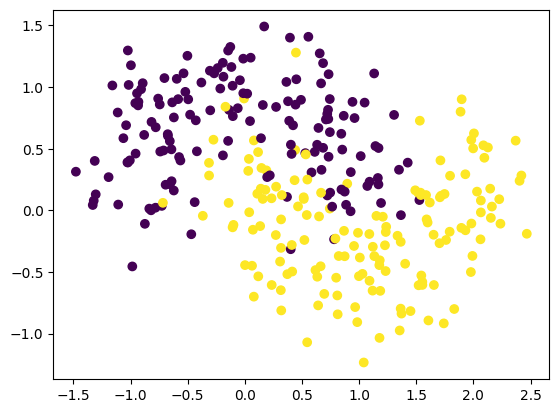

In [6]:
plt.scatter(x=X[:,0], y=X[:,1], c=y)
plt.show()

# WITHOUT REGULARIZATION

In [7]:
model_1 = Sequential()

# Hidden layers
model_1.add(Dense(128, activation='relu', input_dim=2))
model_1.add(Dense(128, activation='relu'))

# Output layer
model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

c:\Users\7200\AppData\Local\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_1 = model_1.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)
history_1 = history_1.history

## Plot learning curve

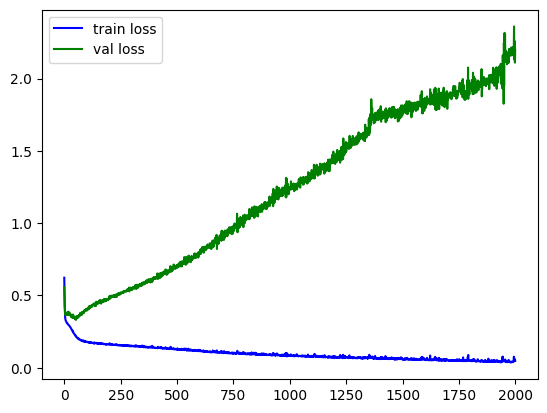

In [9]:
plt.plot(history_1['loss'], label='train loss', color='blue')
plt.plot(history_1['val_loss'], label='val loss', color='green')
plt.legend()
plt.show()

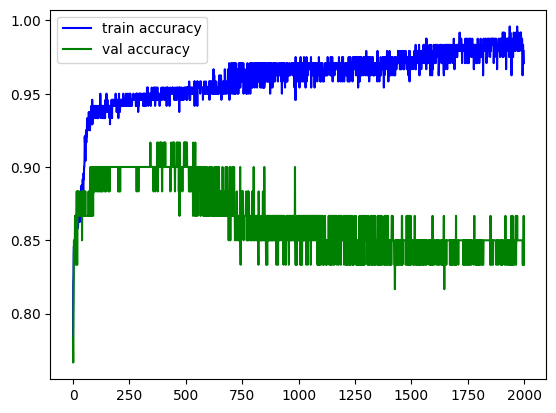

In [10]:
plt.plot(history_1['accuracy'], label='train accuracy', color='blue')
plt.plot(history_1['val_accuracy'], label='val accuracy', color='green')
plt.legend()
plt.show()

## Plot decision boundary

In [11]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step


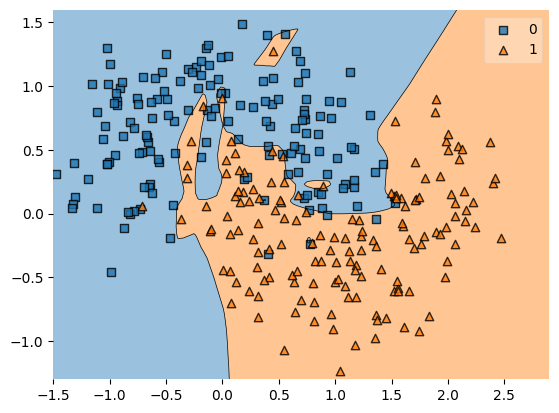

In [12]:
plot_decision_regions(X, y, clf=model_1)
plt.xlim(-1.5, 2.9)
plt.ylim(-1.3, 1.6)
plt.show()

# WITH L2 REGULARIZATION

In [13]:
from tensorflow.keras.regularizers import l2

In [14]:
model_l2 = Sequential()

# Hidden layers
model_l2.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=l2(0.001)))
model_l2.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))

# Output layer
model_l2.add(Dense(1, activation='sigmoid'))

model_l2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_l2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_l2 = model_l2.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)
history_l2 = history_l2.history

## Plot learning curves

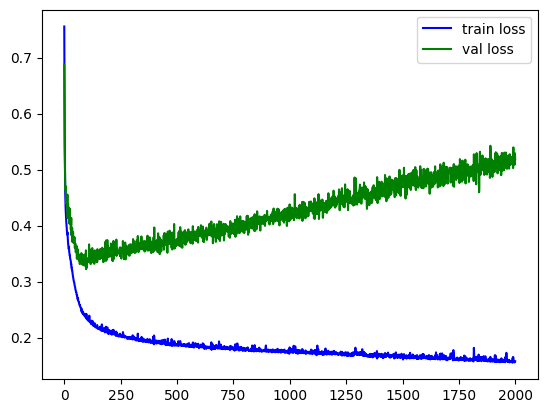

In [ ]:
plt.plot(history_l2['loss'], label='train loss', color='blue')
plt.plot(history_l2['val_loss'], label='val loss', color='green')
plt.legend()
plt.show()

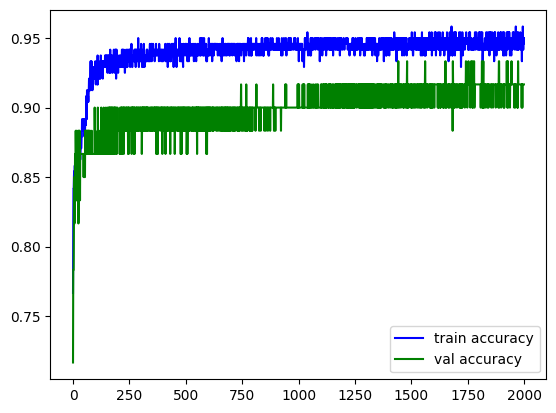

In [ ]:
plt.plot(history_l2['accuracy'], label='train accuracy', color='blue')
plt.plot(history_l2['val_accuracy'], label='val accuracy', color='green')
plt.legend()
plt.show()

## Plot decision boundary

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step


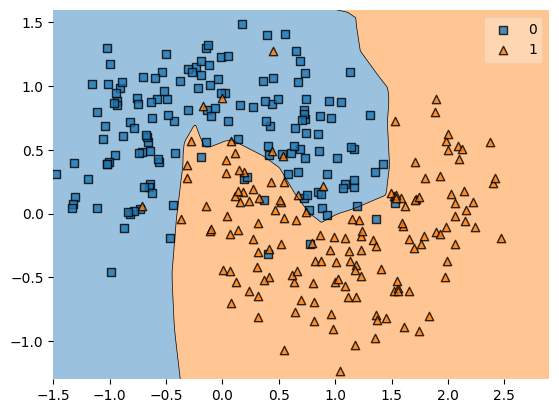

In [ ]:
plot_decision_regions(X, y, clf=model_l2)
plt.xlim(-1.5, 2.9)
plt.ylim(-1.3, 1.6)
plt.show()

# WITH L1 REGULARIZATION

In [ ]:
from tensorflow.keras.regularizers import l1

In [ ]:
model_l1 = Sequential()

# Hidden layers
model_l1.add(Dense(128, activation='relu', input_dim=2, kernel_regularizer=l1(0.001)))
model_l1.add(Dense(128, activation='relu', kernel_regularizer=l1(0.001)))

# Output layer
model_l1.add(Dense(1, activation='sigmoid'))

model_l1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_l1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history_l1 = model_l1.fit(X, y, epochs=2000, validation_split=0.2, verbose=False)
history_l1 = history_l1.history

NameError: name 'model_l1' is not defined

## Plot learning curves

In [ ]:
plt.plot(history_l1['loss'], color='red', label='train loss')
plt.plot(history_l1['val_loss'], color='blue', label='val loss')
plt.legend()
plt.show()

In [ ]:
plt.plot(history_l1['accuracy'], color='red', label='train accuracy')
plt.plot(history_l1['val_accuracy'], color='blue', label='val accuracy')
plt.legend()
plt.show()

## Plot decision boundaries

In [ ]:
plot_decision_regions(X, y, clf=model_l1)
plt.xlim(-1.5, 2.9)
plt.ylim(-1.3, 1.6)
plt.show()

# Comparing L1 and L2 Regulizers

## Comparing weights of L1 and L2 models (for first layers)

In [ ]:
weights_layer1_l1 = model_l1.get_weights()[0].reshape(256)
weights_layer1_l2 = model_l2.get_weights()[0].reshape(256)

## Box plot

In [ ]:
sns.boxplot(weights_layer1_l1, orient='h')

In [ ]:
sns.boxplot(weights_layer1_l2, orient='h')

## Distribution plot

In [ ]:
sns.distplot(weights_layer1_l2)

In [ ]:
sns.distplot(weights_layer1_l1)

# Save models

In [ ]:
model_1.save("model_1.h5")
model_l1.save("model_l1.h5")
model_l2.save("model_l2.h5")